# Sparsity Example: Fitting only features 1 and 2
- feature 2가 전체 모델에 강한 계수를 가지고 있지만, feature 1만 사용했을 때와 비교했을 때 y에 대해 큰 영향을 주지 않는다.

In [1]:
import numpy as np

from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)
indices = (0, 1)

X_train = X[:-20, indices]
X_test = X[-20:, indices]
y_train = y[:-20]
y_test = y[-20:]

In [2]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
_ = ols.fit(X_train, y_train)

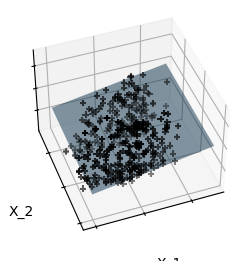

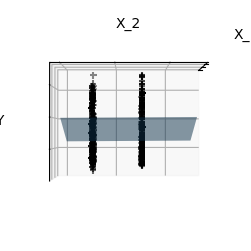

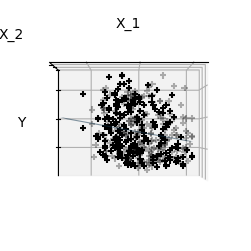

In [3]:
import matplotlib.pyplot as plt

import mpl_toolkits.mplot3d 


def plot_figs(fig_num, elev, azim, X_train, clf):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)

    ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c="k", marker="+")
    ax.plot_surface(
        np.array([[-0.1, -0.1], [0.15, 0.15]]),
        np.array([[-0.1, 0.15], [-0.1, 0.15]]),
        clf.predict(
            np.array([[-0.1, -0.1, 0.15, 0.15], [-0.1, 0.15, -0.1, 0.15]]).T
        ).reshape((2, 2)),
        alpha=0.5,
    )
    ax.set_xlabel("X_1")
    ax.set_ylabel("X_2")
    ax.set_zlabel("Y")
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])


# 서로 다른 관점에서 3 가지 다른 그림을 생성
elev = 43.5
azim = -110
plot_figs(1, elev, azim, X_train, ols)

elev = -0.5
azim = 0
plot_figs(2, elev, azim, X_train, ols)

elev = -0.5
azim = 90
plot_figs(3, elev, azim, X_train, ols)

plt.show()